<a href="https://colab.research.google.com/github/zjuiEMLab/rshub/blob/main/demo/Snow-demo-DMRT-QMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brightness temperature and backscatter of a three-layer snow scenario (DMRT-QMS)

In [1]:
import datetime
import numpy as np
!pip install rshub -q

In [2]:
# Define user token
token = 'ENTER YOUR TOKEN here' # Register your account to get a token
# Change your task name or project name every time you run a new job
project_name = 'Snow Demo1'
task_name1 = 'DMRT-QMS Active'
task_name2 = 'DMRT-QMS Passive'

In [3]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======
# Step 1: Define Scenario flag
# 1: Bare soil
# 2: Snow
# 3: Vegetation covered soil
scenario_flag = 2

# Step 2: Define observation description
# 1) Observation mode
# 1: Active (Backscatter)
# 2: Passive (Brightness temperature)
output_var1 = 1
output_var2 = 2

# 2) Observation characteristics
fGHz = [17.2]

#angle=[30, 40, 50] # Incident Angle
angle = np.arange(0,70,5)
angle = angle.tolist()


# Step 3: Define Algorithm flag
# 1: DMRT-QMS; 2: DMRT-BIC
algorithm = 1

# Step 4: Describe your scenario (Demo shows 3-layer snow)
depth=[30,20,7,18] # [cm]
rho=[0.111,0.224,0.189,0.216] # [gmcc]
dia=[0.5/10,1.0/10,2.0/10,3.0/10] # Grain size diameter [cm]
tau=[0.12,0.15,0.25,0.35] # stickness #
Tsnow=[260,260,260,260] # Snow temperature [K]

Tg=270 # Ground Temperature [K]
mv=0.15 # soil moisture
clayfrac=0.3 #clay fraction

# Passive parameters to calculate surface backscattering
rough_model = 1 # option 1: Q/H model
rough_Q = 0.5  # polarization mixing factor, unitless          
rough_H = 0.5 # roughness height factor, unitless # Q = H = 0, means flat bottom surface     

surf_model_setting_passive=[rough_model,rough_Q,rough_H] #'QH'

# Active parameters to calculate surface backscattering
rough_model = 1    # option 1: 'OH', option 2: 'SPM3D'; option 3: 'NMM3D'(not suggested, has limited ranges); 
rough_rms = 0.25 # rough ground rms height, (cm) rms == 0 assumes flat bottom boundary
rough_ratio = 7  # correlation length / rms height

surf_model_setting_active=[rough_model,rough_rms,rough_ratio] #'OH'

In [4]:
# Input data for Active DMRT-QMS model
data1 = {
    'scenario_flag': scenario_flag, 
    'output_var': output_var1,'fGHz': fGHz,
    'angle':angle,
    'algorithm':algorithm,
    'depth': depth,'rho':rho,'dia':dia,'tau':tau,'Tsnow':Tsnow,'Tg':Tg,
    'mv':mv,'clayfrac':clayfrac,'surf_model_setting':surf_model_setting_active,
    'project_name':project_name,
    'task_name':task_name1,
    'token':token,
    'level_required':1,
    'force_update_flag':1
}

# Input data for Passive DMRT-QMS model
data2 = {
    'scenario_flag': scenario_flag, 
    'output_var': output_var2,'fGHz': fGHz,
    'angle':angle,
    'algorithm':algorithm,
    'depth': depth,'rho':rho,'dia':dia,'tau':tau,'Tsnow':Tsnow,'Tg':Tg,
    'mv':mv,'clayfrac':clayfrac,'surf_model_setting':surf_model_setting_passive,
    'project_name':project_name,
    'task_name':task_name2,
    'token':token,
    'level_required':1,
    'force_update_flag':1
}

## Run models

In [5]:
from rshub import submit_jobs
result1=submit_jobs.run(data1)
result2=submit_jobs.run(data2)

{"scenario_flag": 2, "output_var": 1, "fGHz": [17.2], "angle": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65], "algorithm": 1, "depth": [30, 20, 7, 18], "rho": [0.111, 0.224, 0.189, 0.216], "dia": [0.05, 0.1, 0.2, 0.3], "tau": [0.12, 0.15, 0.25, 0.35], "Tsnow": [260, 260, 260, 260], "Tg": 270, "mv": 0.15, "clayfrac": 0.3, "surf_model_setting": [1, 0.25, 7], "project_name": "Snow Demo1", "task_name": "DMRT-QMS Active", "level_required": 1, "force_update_flag": 1}
{"scenario_flag": 2, "output_var": 2, "fGHz": [17.2], "angle": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65], "algorithm": 1, "depth": [30, 20, 7, 18], "rho": [0.111, 0.224, 0.189, 0.216], "dia": [0.05, 0.1, 0.2, 0.3], "tau": [0.12, 0.15, 0.25, 0.35], "Tsnow": [260, 260, 260, 260], "Tg": 270, "mv": 0.15, "clayfrac": 0.3, "surf_model_setting": [1, 0.5, 0.5], "project_name": "Snow Demo1", "task_name": "DMRT-QMS Passive", "level_required": 1, "force_update_flag": 1}


In [6]:
print(result1['result'])

Job submitted!


In [7]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' project_name = {project_name} \n')
f.write(f' task_name = {task_name1} \n')
f.write(f' data = {data1} \n')
f.write(f' task_name = {task_name2} \n')
f.write(f' data = {data2} \n')
f.write('================================ \n')
f.close()

# Check status of code (It may take a long time, especially for active model!)

In [11]:
from rshub import submit_jobs
result=submit_jobs.check_completion(token, project_name, task_name1)
print(result)

Jobs are completed


# Check if there are any error messages

In [12]:
from rshub.load_file import load_file
data = load_file(token, project_name, task_name1,fGHz[0])
message = data.load_error_message()

message: Jobs completed succesfully



# Post Process

In [13]:
from rshub.load_file import load_file

In [15]:
# load mat file with project id, frequencies,variables to load

TB_v=[]
TB_h=[]
for i,inc_ang in enumerate(angle):
    data2 = load_file(token, project_name, task_name2,fGHz[0], scenario_flag, output_var2, inc_ang)
    data_active = data2.load_outputs()
    # Read variables into python

    TB_v.append(data_active['Tb_v0'][:,0]) # vertical Tbs
    TB_h.append(data_active['Tb_h0'][:,0]) # horizontal Tbs
theta_obs = angle # incident angle

In [16]:
# load mat file with project id, frequencies,variables to load
backscatter_vv=[]
backscatter_vh=[]
for i,inc_ang in enumerate(angle):
    data1 = load_file(token, project_name, task_name1,fGHz[0],scenario_flag,output_var1,inc_ang)
    data_active = data1.load_outputs()
    # Read variables into python

    backscatter_vv.append(data_active['vvdb'][:,0]) # VV backscatters
    backscatter_vh.append(data_active['vhdb'][:,0]) # VH backscatters
theta_obs = angle # incident angle

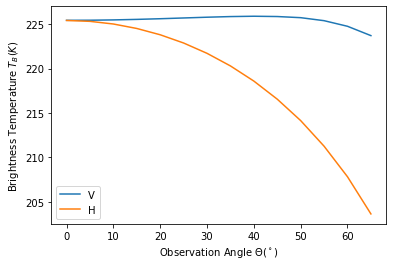

In [17]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs, TB_v, color='tab:blue')
ax.plot(theta_obs, TB_h, color='tab:orange')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Brightness Temperature $T_B(K)$')
ax.legend(['V', 'H'])

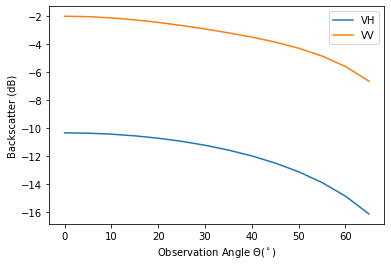

In [18]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs, backscatter_vh, color='tab:blue')
ax.plot(theta_obs, backscatter_vv, color='tab:orange')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Backscatter (dB)')
ax.legend(['VH', 'VV'])